# Netflix Movies and TV Shows

In this project we analysed which type of Movies and TV Shows are availble in the Netflix which is an OTT platform which is used by all the people in the world and show their interest.

Im every year and every month almost all movies and TV shows are released in this Platform.

## Downloading the Dataset

Firstly I make the account on the kaggle and download the dataset from here https://www.kaggle.com/datasets?fileType=csv using opendatasets library and extract it.

In [3]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [4]:
# Change this
dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows' 

In [7]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: amanpratapchandra
Your Kaggle Key: ········


100%|██████████| 971k/971k [00:00<00:00, 95.5MB/s]

The dataset has been downloaded and extracted.

In [8]:
# Change this
data_dir = './netflix-shows'

In [9]:
import os
os.listdir(data_dir)

['netflix_titles.csv']

Let us save and upload our work to Jovian before continuing.

In [10]:
project_name = "netflix-movies-and-tv-shows" # change this (use lowercase letters and hyphens only)

In [11]:
!pip install jovian --upgrade -q

In [12]:
import jovian

In [14]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "2018eeb1139/netflix-movies-and-tv-shows" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/2018eeb1139/netflix-movies-and-tv-shows


'https://jovian.ml/2018eeb1139/netflix-movies-and-tv-shows'

## Data Preparation and Cleaning

Firstly I import the pandas library as pd and read the CSV file as netflix_df then i drop some of the columns from the dataframe and The final part of data preparation will be to split the data set in two - into "Movies" and "TV-Shows", as each have their own specifics, due to which it is not entirely fair to keep them in the same dataset at all times.



In [15]:
import pandas as pd


In [16]:
netflix_df = pd.read_csv(data_dir+'/netflix_titles.csv')

In [17]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [18]:
netflix_df = netflix_df.drop(['show_id', 'description'], axis='columns', inplace=False)

In [19]:
netflix_df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies
...,...,...,...,...,...,...,...,...,...,...
6229,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6230,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies
6231,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"


In [20]:
netflix_movies_df = netflix_df[netflix_df['type'] == 'Movie']

In [21]:
netflix_movies_df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies
6,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers"
7,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy
...,...,...,...,...,...,...,...,...,...,...
5577,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries
5578,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies"
5579,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies"
5580,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109 min,Documentaries


In [22]:
netflix_shows_df = netflix_df[netflix_df['type'] == 'TV Show']

In [23]:
netflix_shows_df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV
5,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis..."
8,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV"
26,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...
6228,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV
6229,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6230,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"


In [24]:
import jovian

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "2018eeb1139/netflix-movies-and-tv-shows" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/2018eeb1139/netflix-movies-and-tv-shows


'https://jovian.ml/2018eeb1139/netflix-movies-and-tv-shows'

## Exploratory Analysis and Visualization

How many movies/tv shows/total entries were there on Netflix when this dataset was current?\

How many entries are listed in individual categories? (Docu, Action, Comedy, etc.)

What percentage of the overall catalogue does each category hold?

What percentage of overall entries have been produced in which country?

Who are the top 10 directors with most movies made?



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [26]:
import seaborn as sb
import matplotlib
import numpy as np
import matplotlib.pyplot as mpl
%matplotlib inline

sb.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [27]:
print('Movies: ' + str(len(netflix_movies_df)))
print('TV-Shows: ' + str(len(netflix_shows_df)))
print('Total: ' + str(len(netflix_df)))

Movies: 4265
TV-Shows: 1969
Total: 6234


We have seen that there are lot of movies and the TV shows are very less in the terms of no. as compared to Movies which are released on Netflix. So while there are more movies, nearly two thousand TV-Shows might be several times the content present in the "Movies" section, which is also a possible argument for marketing.

In [28]:
movie_entries = pd.unique(netflix_movies_df['listed_in'])
show_entries = pd.unique(netflix_shows_df['listed_in'])
overall_entries = pd.unique(netflix_df['listed_in'])
print(movie_entries)
print(show_entries)
print(overall_entries)

['Children & Family Movies, Comedies' 'Stand-Up Comedy' 'Comedies'
 'International Movies, Sci-Fi & Fantasy, Thrillers'
 'Action & Adventure, Thrillers'
 'Action & Adventure, Dramas, International Movies'
 'Children & Family Movies' 'Cult Movies, Dramas, Independent Movies'
 'Comedies, Independent Movies, Romantic Movies'
 'Action & Adventure, Comedies, International Movies' 'Documentaries'
 'Horror Movies, Thrillers' 'Dramas, Independent Movies'
 'Dramas, Independent Movies, Romantic Movies'
 'Horror Movies, International Movies'
 'Children & Family Movies, Comedies, Sci-Fi & Fantasy'
 'Comedies, Romantic Movies' 'Dramas, International Movies, Thrillers'
 'Dramas, Independent Movies, International Movies'
 'Comedies, Dramas, Independent Movies' 'Comedies, International Movies'
 'Comedies, International Movies, Romantic Movies'
 'Action & Adventure, Comedies, Independent Movies'
 'Comedies, Dramas, International Movies'
 'Dramas, International Movies, Romantic Movies' 'Comedies, Dramas

We have shown the genres of all type of movies. This shows a wide variety of genre all movies and TV shows are directed by all the the directors and actors shows all their interest in these type of movies and TV Shows. It would take too long to count the amount of shows/movies present in each category. Thus what we need is a program, which will create and populate each category based on whether a movie or show has been assigned to it. 

In [29]:
child, famil, comed, stand, thril, horro, actio, drama, indep, docum = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
inter, roman, music, anime, cultm, scifi, sport, clasi, lgbtq, faith = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

for movie in netflix_movies_df['listed_in']:
    if "Children" in movie:
        child += 1
    if "Family" in movie:
        famil += 1
    if "Comed" in movie:
        comed += 1
    if "Stand" in movie:
        stand += 1
    if "Thriller" in movie:
        thril += 1
    if "Horror" in movie:
        horro += 1
    if "Action" in movie:
        actio += 1
    if "Drama" in movie:
        drama += 1
    if "Independent" in movie:
        indep += 1
    if "Documentaries" in movie:
        docum += 1
    if "International" in movie:
        inter += 1
    if "Romantic" in movie:
        roman += 1
    if "Music" in movie:
        music += 1
    if "Anime" in movie:
        anime += 1
    if "Cult" in movie:
        cultm += 1
    if "Sci" in movie:
        scifi += 1
    if "Sport" in movie:
        sport += 1
    if "Classic" in movie:
        clasi += 1
    if "LGBTQ" in movie:
        lgbtq += 1
    if "Faith" in movie:
        faith += 1
childpct = round((child/len(netflix_movies_df)*100), 2)
familpct = round((famil/len(netflix_movies_df)*100), 2)
comedpct = round((comed/len(netflix_movies_df)*100), 2)
standpct = round((stand/len(netflix_movies_df)*100), 2)
thrilpct = round((thril/len(netflix_movies_df)*100), 2)
horropct = round((horro/len(netflix_movies_df)*100), 2)
actiopct = round((actio/len(netflix_movies_df)*100), 2)
dramapct = round((drama/len(netflix_movies_df)*100), 2)
indeppct = round((indep/len(netflix_movies_df)*100), 2)
documpct = round((docum/len(netflix_movies_df)*100), 2)
interpct = round((inter/len(netflix_movies_df)*100), 2)
romanpct = round((roman/len(netflix_movies_df)*100), 2)
musicpct = round((music/len(netflix_movies_df)*100), 2)
animepct = round((anime/len(netflix_movies_df)*100), 2)
cultmpct = round((cultm/len(netflix_movies_df)*100), 2)
scifipct = round((scifi/len(netflix_movies_df)*100), 2)
sportpct = round((sport/len(netflix_movies_df)*100), 2)
clasipct = round((clasi/len(netflix_movies_df)*100), 2)
lgbtqpct = round((lgbtq/len(netflix_movies_df)*100), 2)
faithpct = round((faith/len(netflix_movies_df)*100), 2)
print('Movies for Children/Families: ' + str(child) + ", which is " + str(childpct) + "% of all movies")
print('Comedies: ' + str(comed) + ", which is " + str(comedpct) + "% of all movies")
print('Stand-Up Comedies: ' + str(stand) + ", which is " + str(standpct) + "% of all movies")
print('Thriller Movies: ' + str(thril) + ", which is " + str(thrilpct) + "% of all movies")
print('Horror Movies: ' + str(horro) + ", which is " + str(horropct) + "% of all movies")
print('Action Movies: ' + str(actio) + ", which is " + str(actiopct) + "% of all movies")
print('Dramas: ' + str(drama) + ", which is " + str(dramapct) + "% of all movies")
print('Independent (indie) movies: ' + str(indep) + ", which is " + str(indeppct) + "% of all movies")
print('Documentaries: ' + str(docum) + ", which is " + str(documpct) + "% of all movies")
print('International Movies: ' + str(inter) + ", which is " + str(interpct) + "% of all movies")
print('Romantic Movies: ' + str(roman) + ", which is " + str(romanpct) + "% of all movies")
print('Music/Musical Movies: ' + str(music) + ", which is " + str(musicpct) + "% of all movies")
print('Anime Movies: ' + str(anime) + ", which is " + str(animepct) + "% of all movies")
print('Cult-Classic Movies: ' + str(cultm) + ", which is " + str(cultmpct) + "% of all movies")
print('Sci-Fi Movies: ' + str(scifi) + ", which is " + str(scifipct) + "% of all movies")
print('Sports Movies: ' + str(sport) + ", which is " + str(sportpct) + "% of all movies")
print('Classic Movies: ' + str(clasi) + ", which is " + str(clasipct) + "% of all movies")
print('LGBTQ Movies: ' + str(lgbtq) + ", which is " + str(lgbtqpct) + "% of all movies")

Movies for Children/Families: 378, which is 8.86% of all movies
Comedies: 1394, which is 32.68% of all movies
Stand-Up Comedies: 281, which is 6.59% of all movies
Thriller Movies: 392, which is 9.19% of all movies
Horror Movies: 262, which is 6.14% of all movies
Action Movies: 597, which is 14.0% of all movies
Dramas: 1623, which is 38.05% of all movies
Independent (indie) movies: 552, which is 12.94% of all movies
Documentaries: 668, which is 15.66% of all movies
International Movies: 1927, which is 45.18% of all movies
Romantic Movies: 376, which is 8.82% of all movies
Music/Musical Movies: 243, which is 5.7% of all movies
Anime Movies: 45, which is 1.06% of all movies
Cult-Classic Movies: 55, which is 1.29% of all movies
Sci-Fi Movies: 193, which is 4.53% of all movies
Sports Movies: 157, which is 3.68% of all movies
Classic Movies: 84, which is 1.97% of all movies
LGBTQ Movies: 60, which is 1.41% of all movies


## Now that we have the raw data, lets use it in a visualisation.

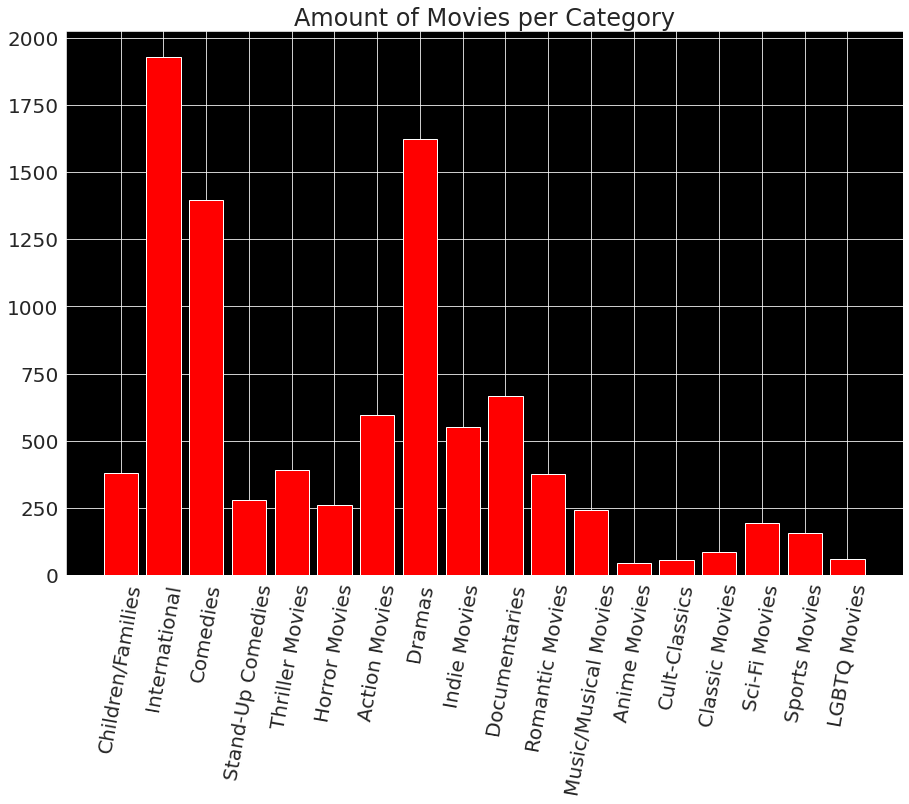

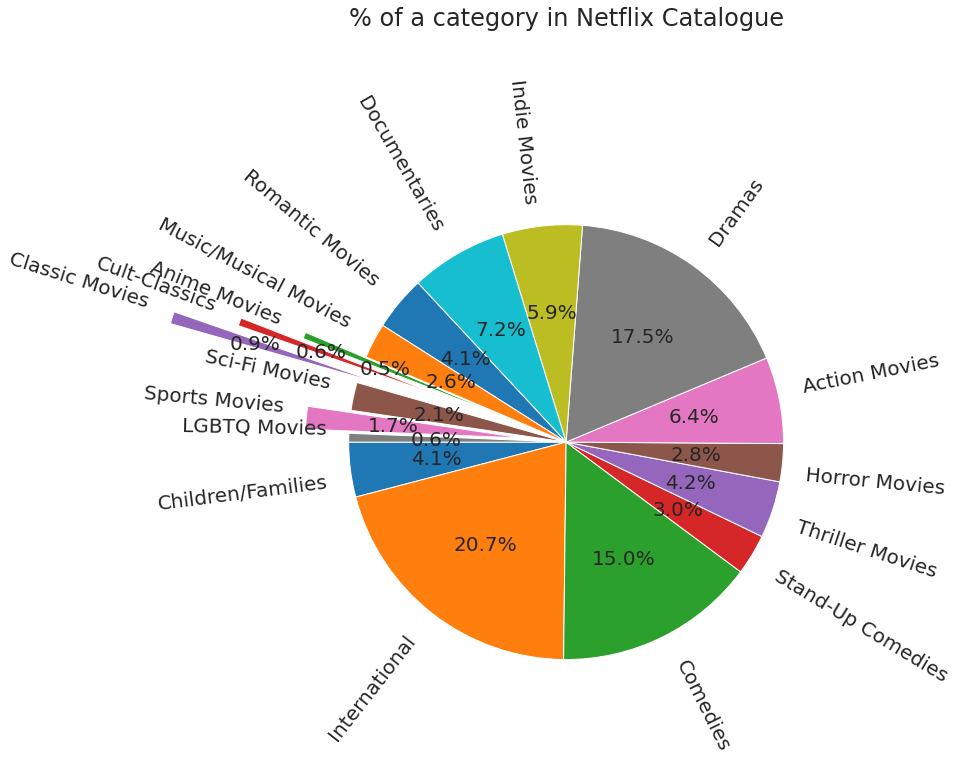

In [30]:
categories = ('Children/Families', 'International', 'Comedies', 'Stand-Up Comedies', 'Thriller Movies', 'Horror Movies', 'Action Movies', 'Dramas', 'Indie Movies', 'Documentaries', 'Romantic Movies', 'Music/Musical Movies', 'Anime Movies', 'Cult-Classics', 'Classic Movies', 'Sci-Fi Movies', 'Sports Movies', 'LGBTQ Movies')
amounts = child, inter, comed, stand, thril, horro, actio, drama, indep, docum, roman, music, anime, cultm, clasi, scifi, sport, lgbtq
percentages = childpct, interpct, comedpct, standpct, thrilpct, horropct, actiopct, dramapct, indeppct, documpct, romanpct, musicpct, animepct, cultmpct, clasipct, scifipct, sportpct, lgbtqpct

mpl.rcParams.update({'font.size': 20})
mpl.rcParams['axes.facecolor'] = 'black'
mpl.figure(figsize=(15, 10))
mpl.xticks(rotation=80)
mpl.title('Amount of Movies per Category')
mpl.bar(categories, amounts, color='r');


mpl.figure(figsize=(15, 10))
explodeTuple = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.6, 0.9, 0.0, 0.2, 0.0)
mpl.title('''% of a category in Netflix Catalogue


                                                
                                                
                                                ''')
mpl.pie(percentages, explode=explodeTuple, labels=categories, autopct='%1.1f%%', rotatelabels = True, startangle=180);

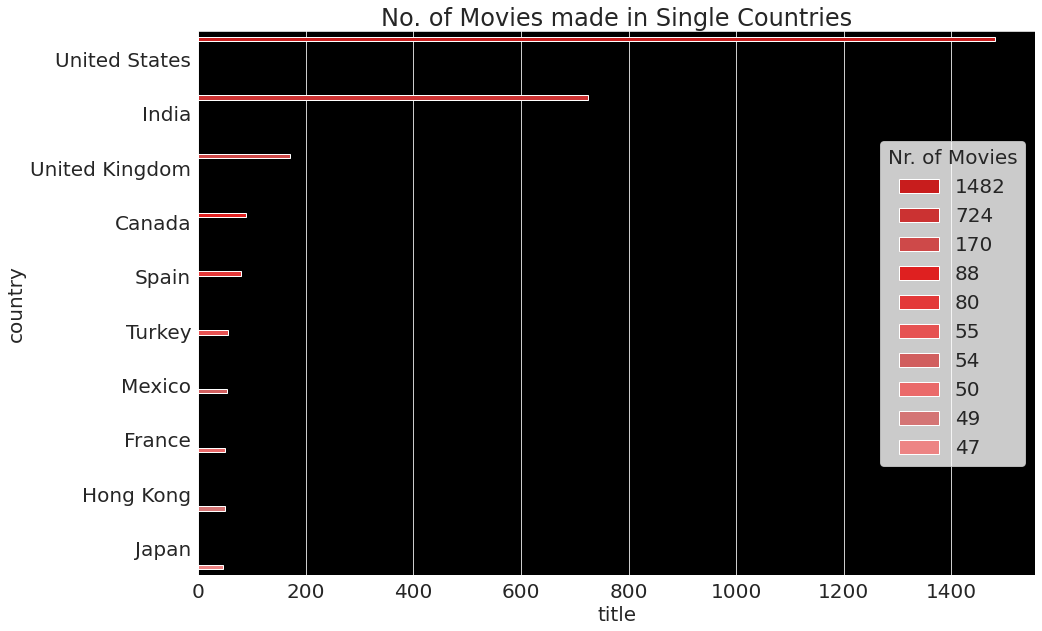

In [31]:
movies_per_country = netflix_movies_df.groupby('country')[['title']].count().sort_values(by=['title'], ascending=False).head(10)
movies_per_country = movies_per_country.reset_index()
colors = ['#E40000', '#E41919', '#E43333', '#FF0000', '#FF1C1C', '#FF3939', '#E44C4C', '#FF5555', '#E46565', '#FF7272']
sb.set_palette(sb.color_palette(colors))

mpl.rcParams.update({'font.size': 20})
mpl.figure(figsize=(15, 10))
mpl.title('No. of Movies made in Single Countries')
sb.barplot(data=movies_per_country, x='title', y='country', hue=movies_per_country.title, hue_order=movies_per_country.title)
mpl.legend(title='Nr. of Movies', facecolor='white')

In [32]:
movie_directors = netflix_movies_df.groupby('director')[['title']].count().sort_values(by=['title'], ascending=False).head(10)
movie_directors = movie_directors.reset_index()

movie_directors.rename(columns={'title': 'Nr. of Movies'}, inplace = False)

,director,Nr. of Movies
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,14
2,Jay Karas,13
3,Jay Chapman,12
4,Martin Scorsese,9
5,Steven Spielberg,9
6,Johnnie To,8
7,Lance Bangs,8
8,David Dhawan,8
9,Cathy Garcia-Molina,7


In [33]:
kidtv, crime, inttv, spani, doctv, scies, comtv = 0, 0, 0, 0, 0, 0, 0
britv, anatv, teens, korea, reali, anitv, myste = 0, 0, 0, 0, 0, 0, 0
thrtv, cnctv, scitv, fantv, talks, dratv, romtv, hortv = 0, 0, 0, 0, 0, 0, 0, 0

for show in netflix_shows_df['listed_in']:
    if "Kids" in show:
        kidtv += 1
    if "Crime" in show:
        crime += 1
    if "International" in show:
        inttv += 1
    if "Spanish" in show:
        spani += 1
    if "Docu" in show:
        doctv += 1
    if "Science" in show:
        scies += 1
    if "Comedi" in show:
        comtv += 1
    if "British" in show:
        britv += 1
    if "Action" in show:
        anatv += 1
    if "Teen" in show:
        teens += 1
    if "Korea" in show:
        korea += 1
    if "Reality" in show:
        reali += 1
    if "Anime" in show:
        anitv += 1
    if "Myster" in show:
        myste +=1
    if "Thrill" in show:
        thrtv += 1
    if "Classic" in show:
        cnctv += 1
    if "Sci" in show:
        scitv +=1
    if "Fantasy" in show:
        fantv += 1
    if "Talk" in show:
        talks += 1
    if "Drama" in show:
        dratv += 1
    if "Romantic" in show:
        romtv += 1
    if "Horror" in show:
        hortv += 1
kidtvpct = round((kidtv/len(netflix_shows_df)*100), 2)
crimepct = round((crime/len(netflix_shows_df)*100), 2)
inttvpct = round((inttv/len(netflix_shows_df)*100), 2)
spanipct = round((spani/len(netflix_shows_df)*100), 2)
doctvpct = round((doctv/len(netflix_shows_df)*100), 2)
sciespct = round((scies/len(netflix_shows_df)*100), 2)
comtvpct = round((comtv/len(netflix_shows_df)*100), 2)
britvpct = round((britv/len(netflix_shows_df)*100), 2)
anatvpct = round((anatv/len(netflix_shows_df)*100), 2)
teenspct = round((teens/len(netflix_shows_df)*100), 2)
koreapct = round((korea/len(netflix_shows_df)*100), 2)
realipct = round((reali/len(netflix_shows_df)*100), 2)
anitvpct = round((anitv/len(netflix_shows_df)*100), 2)
mystepct = round((myste/len(netflix_shows_df)*100), 2)
thrtvpct = round((thrtv/len(netflix_shows_df)*100), 2)
cnctvpct = round((cnctv/len(netflix_shows_df)*100), 2)
scitvpct = round((scitv/len(netflix_shows_df)*100), 2)
fantvpct = round((fantv/len(netflix_shows_df)*100), 2)
talkspct = round((talks/len(netflix_shows_df)*100), 2)
dratvpct = round((dratv/len(netflix_shows_df)*100), 2)
romtvpct = round((romtv/len(netflix_shows_df)*100), 2)
hortvpct = round((hortv/len(netflix_shows_df)*100), 2)
print("TV-Shows for Children: " + str(kidtv) + ", which is " + str(kidtvpct) + "% of all shows")
print("Crime TV-Shows: " + str(crime) + ", which is " + str(crimepct) + "% of all shows")
print("International TV-Shows: " + str(inttv) + ", which is " + str(inttvpct) + "% of all shows")
print("Spanish TV-Shows: " + str(spani) + ", which is " + str(spanipct) + "% of all shows")
print("Documentaries: " + str(doctv) + ", which is " + str(doctvpct) + "% of all shows")
print("TV-Shows about Science/Nature: " + str(scies) + ", which is " + str(sciespct) + "% of all shows")
print("Comedy TV-Shows: " + str(comtv) + ", which is " + str(comtvpct) + "% of all shows")
print("TV-Shows from Britain: " + str(britv) + ", which is " + str(britvpct) + "% of all shows")
print("Action/Adventure TV-Shows: " + str(anatv) + ", which is " + str(anatvpct) + "% of all shows")
print("TV-Shows for Teenagers: " + str(teens) + ", which is " + str(teenspct) + "% of all shows")
print("TV-Shows from Korea: " + str(korea) + ", which is " + str(koreapct) + "% of all shows")
print("Reality TV-Shows: " + str(reali) + ", which is " + str(realipct) + "% of all shows")
print("Anime TV-Shows: " + str(anitv) + ", which is " + str(anitvpct) + "% of all shows")
print("Mystery TV-Shows: " + str(myste) + ", which is " + str(mystepct) + "% of all shows")
print("Thriller TV-Shows: " + str(thrtv) + ", which is " + str(thrtvpct) + "% of all shows")
print("Classic or Cult TV-Shows: " + str(cnctv) + ", which is " + str(cnctvpct) + "% of all shows")
print("Sci-Fi Shows: " + str(scitv) + ", which is " + str(scitvpct) + "% of all shows")
print("Fantasy Shows: " + str(fantv) + ", which is " + str(fantvpct) + "% of all shows")
print("Talk-Shows: " + str(talks) + ", which is " + str(talkspct) + "% of all shows")
print("TV-Dramas: " + str(dratv) + ", which is " + str(dratvpct) + "% of all shows")
print("Romantic Shows: " + str(romtv) + ", which is " + str(romtvpct) + "% of all shows")
print("Horror TV-Shows: " + str(hortv) + ", which is " + str(hortvpct) + "% of all shows")

TV-Shows for Children: 328, which is 16.66% of all shows
Crime TV-Shows: 363, which is 18.44% of all shows
International TV-Shows: 1001, which is 50.84% of all shows
Spanish TV-Shows: 117, which is 5.94% of all shows
Documentaries: 279, which is 14.17% of all shows
TV-Shows about Science/Nature: 67, which is 3.4% of all shows
Comedy TV-Shows: 436, which is 22.14% of all shows
TV-Shows from Britain: 210, which is 10.67% of all shows
Action/Adventure TV-Shows: 126, which is 6.4% of all shows
TV-Shows for Teenagers: 44, which is 2.23% of all shows
TV-Shows from Korea: 132, which is 6.7% of all shows
Reality TV-Shows: 153, which is 7.77% of all shows
Anime TV-Shows: 117, which is 5.94% of all shows
Mystery TV-Shows: 69, which is 3.5% of all shows
Thriller TV-Shows: 44, which is 2.23% of all shows
Classic or Cult TV-Shows: 24, which is 1.22% of all shows
Sci-Fi Shows: 135, which is 6.86% of all shows
Fantasy Shows: 68, which is 3.45% of all shows
Talk-Shows: 42, which is 2.13% of all shows


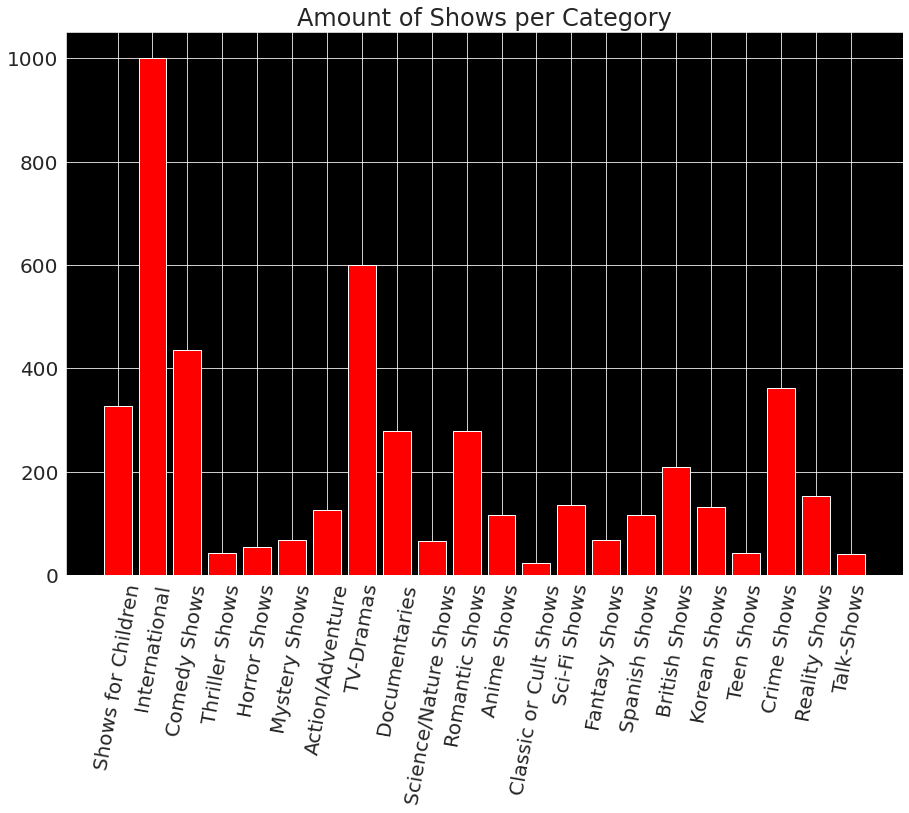

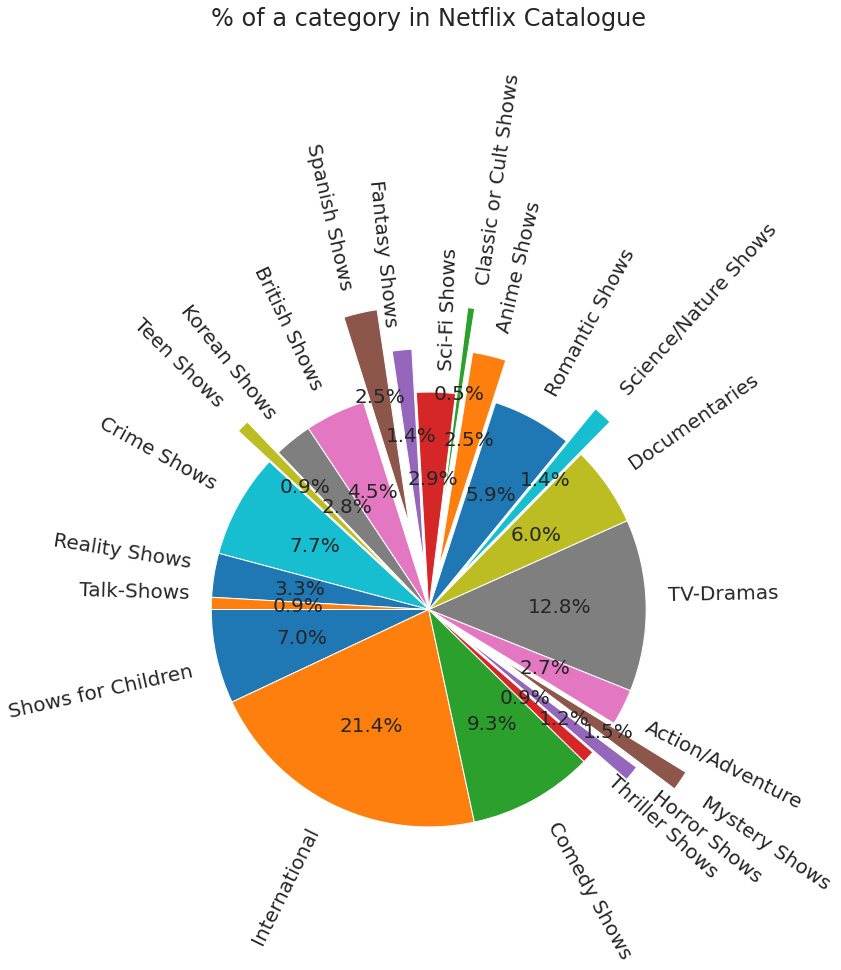

In [34]:
categories2 = ('Shows for Children', 'International', 'Comedy Shows', 'Thriller Shows', 'Horror Shows', 'Mystery Shows', 'Action/Adventure', 'TV-Dramas', 'Documentaries', 'Science/Nature Shows', 'Romantic Shows', 'Anime Shows', 'Classic or Cult Shows', 'Sci-Fi Shows', 'Fantasy Shows', 'Spanish Shows', 'British Shows', 'Korean Shows', 'Teen Shows', 'Crime Shows', 'Reality Shows', 'Talk-Shows')
amounts2 = kidtv, inttv, comtv, thrtv, hortv, myste, anatv, dratv, doctv, scies, romtv, anitv, cnctv, scitv, fantv, spani, britv, korea, teens, crime, reali, talks
percentages2 = kidtvpct, inttvpct, comtvpct, thrtvpct, hortvpct, mystepct, anatvpct, dratvpct, doctvpct, sciespct, romtvpct, anitvpct, cnctvpct, scitvpct, fantvpct, spanipct, britvpct, koreapct, teenspct, crimepct, realipct, talkspct


mpl.rcParams.update({'font.size': 20})
mpl.rcParams['axes.facecolor'] = 'black'
mpl.figure(figsize=(15, 10))
mpl.xticks(rotation=80)
mpl.title('Amount of Shows per Category')
mpl.bar(categories2, amounts2, color='r');

sb.set_palette(sb.color_palette('tab10'))
mpl.figure(figsize=(15, 10))
explodeTuple = (0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.0, 0.0, 0.0, 0.2, 0.0, 0.2, 0.4, 0.0, 0.2, 0.4, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0)
mpl.title('''% of a category in Netflix Catalogue


                                                
                                                
                                                
                                                
                                                
                                                
                                                
                                                
                                                ''')
mpl.pie(percentages2, explode=explodeTuple, labels=categories2, autopct='%1.1f%%', rotatelabels = True, startangle=180);

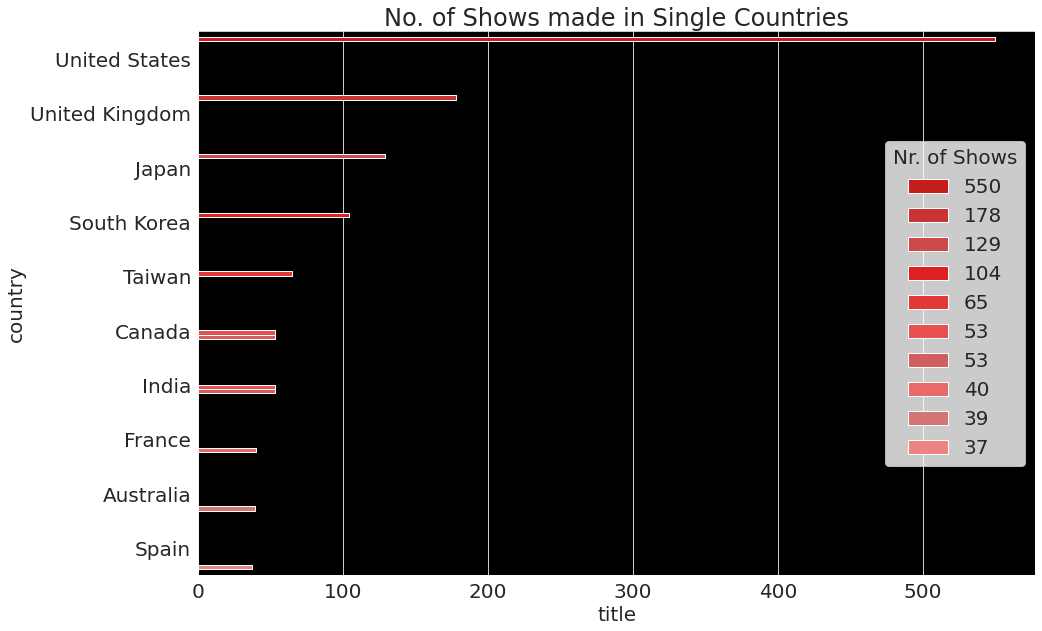

In [35]:
shows_per_country = netflix_shows_df.groupby('country')[['title']].count().sort_values(by=['title'], ascending=False).head(10)
shows_per_country = shows_per_country.reset_index()
colors = ['#E40000', '#E41919', '#E43333', '#FF0000', '#FF1C1C', '#FF3939', '#E44C4C', '#FF5555', '#E46565', '#FF7272']
sb.set_palette(sb.color_palette(colors))

mpl.rcParams.update({'font.size': 20})
mpl.figure(figsize=(15, 10))
mpl.title('No. of Shows made in Single Countries')
sb.barplot(data=shows_per_country, x='title', y='country', hue=shows_per_country.title, hue_order=shows_per_country.title)
mpl.legend(title='Nr. of Shows', facecolor='white')

In [36]:
show_directors = netflix_shows_df.groupby('director')[['title']].count().sort_values(by=['title'], ascending=False).head(10)
show_directors = show_directors.reset_index()

show_directors.rename(columns={'title': 'Nr. of Shows'}, inplace = False)

,director,Nr. of Shows
0,Alastair Fothergill,3
1,Stan Lathan,2
2,Iginio Straffi,2
3,Ken Burns,2
4,Rob Seidenglanz,2
5,Shin Won-ho,2
6,Michel Tikhomiroff,1
7,Miguel Conde,1
8,Neslihan Yesilyurt,1
9,Nizar Shafi,1


Let us save and upload our work to Jovian before continuing

In [37]:
import jovian

In [38]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "2018eeb1139/netflix-movies-and-tv-shows" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/2018eeb1139/netflix-movies-and-tv-shows


'https://jovian.ml/2018eeb1139/netflix-movies-and-tv-shows'

## Asking and Answering Questions

As we can see above we have already posed and answered several basic questions. Now we can look at what these visualisations may be used in.

Does the catalogue contain more hours of Movies or TV-Shows?

Are there similarities in categories of movies and shows?

Which country is likely the target audience of Netflix?

Directors in TV-Shows vs. those in Movies.



## Does the Catalogue contain more hours of Movies or TV-Shows?

As was already suggested in one of the pieces of text above - while there are significantly more movies than there are shows, the amount of minutes you can spend watching a TV-Show can be significantly higher than while watching movies.

In order to demonstrate this I will make two assumptions, as the needed data is missing in the dataframe:

1.) I will assume that each show has an average of 8 episodes (which is inaccurate, as there are shows which have less than five and there are very few which have more than 10, but in order to get accurate data we would need to do a deep-dive in the central database of Netflix, which is not an option at the moment).

2.) I will assume that each episode has 40 minutes on average (again - wildly inaccurate, however most shows dont have less than 20 minutes or more than 70 minutes per episode and,juding by personal experience, most of the show categories whith the highest percentage share of the catalogue, such as docu or crime, have an average of 45 minutes, while the lowest (such as Anime, Adventure, Fantasy) average at around 25 minutes, which should meet at around 35 minutes per episode. I also know for a fact, that there are a number of shows with episodes longer than 60 minutes, hence the personal guess. But again - for accurate numbers I would need a deep-dive.)
The remaining numbers can be extracted from the available sources and will thus be used after a bit of preparation (such as the average amount of series/show).


Total of 422665 minutes of movies.

Total of 1834761.5999999999 minutes of shows.


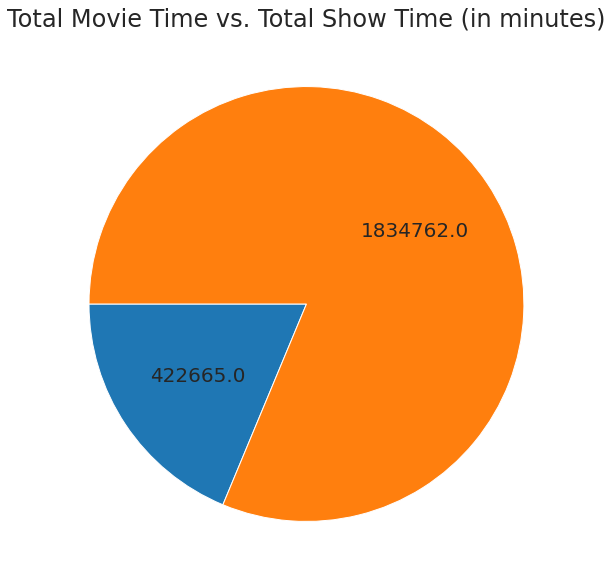

In [39]:
total_movie_time = 0
for i in netflix_movies_df['duration']:
    if "min" in i:
        total_movie_time += int(i.replace(" min", ""))
print("Total of " + str(total_movie_time) + " minutes of movies.")
print()

total_show_series = 0

for j in netflix_shows_df['duration']:
    total_show_series += int(j[0])

series_per_show_avg = total_show_series/len(netflix_shows_df['duration'])
total_show_time = total_show_series*(round(series_per_show_avg*8*40, 2))

#print("There are " + str(total_show_series) + " series of shows.")
#print("Averaging at " + str(series_per_show_avg) + " series per show.")
print("Total of " + str(total_show_time) + " minutes of shows.")

time_list = np.array([total_movie_time, total_show_time])

def absolute_value(val):
    a  = np.round(val/100.*time_list.sum(), 0)
    return a

mpl.rcParams.update({'font.size': 20})
mpl.figure(figsize=(15, 10))
sb.set_palette(sb.color_palette('tab10'))
mpl.title('Total Movie Time vs. Total Show Time (in minutes)')
mpl.pie(time_list, autopct=absolute_value, rotatelabels = True, startangle=180);

We saw in the above, that indeed the raw amounts are not neccessarily the most important factor in trying to figure out, how much hard-drive space and network power is needed to manage the data flow.
While this is a useful question for IT, Marketing and HR to answer, what about the individual categories? Do we need certain categories in TV-Shows or should they be merged, (as having many categories will make the catalogue more detailed, but it will create more folders and thus adversely affect the time it takes to access each episode/movie) hence saving up some speed? Are certain Movie categories more populous than their Show counterparts?
These questions may also lead to further, deep-dive-dependant questions which can also help numerous departments in being effective at their job.


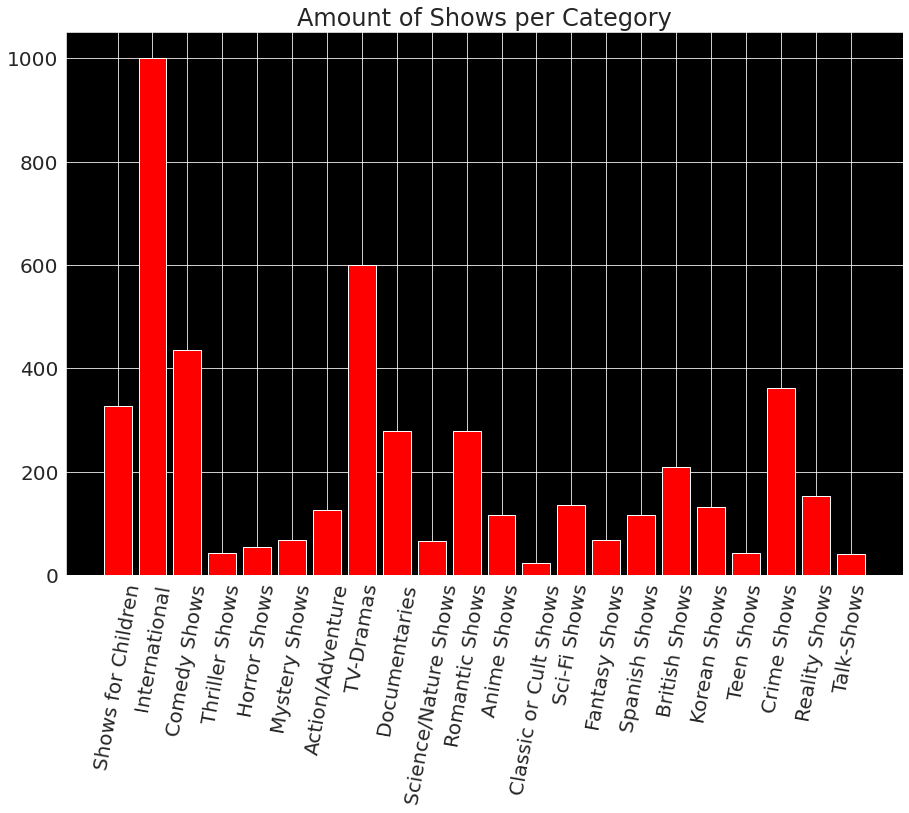

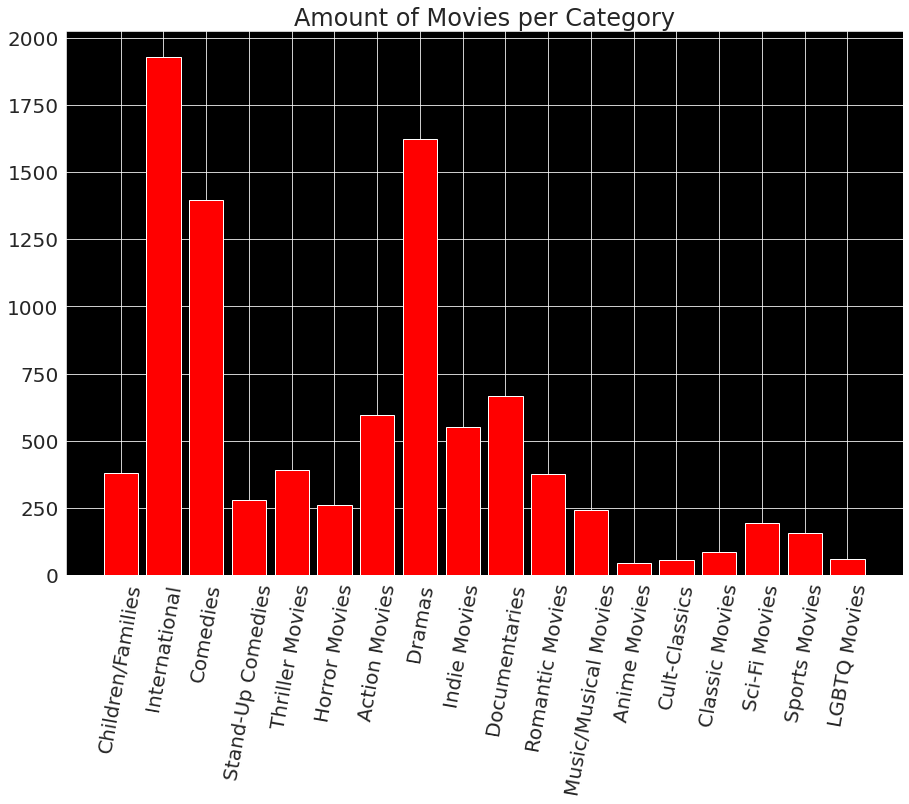

In [40]:
mpl.rcParams.update({'font.size': 20})
mpl.rcParams['axes.facecolor'] = 'black'
mpl.figure(figsize=(15, 10))
mpl.xticks(rotation=80)
mpl.title('Amount of Shows per Category')
mpl.bar(categories2, amounts2, color='r');

mpl.rcParams.update({'font.size': 20})
mpl.rcParams['axes.facecolor'] = 'black'
mpl.figure(figsize=(15, 10))
mpl.xticks(rotation=80)
mpl.title('Amount of Movies per Category')
mpl.bar(categories, amounts, color='r');

## Are there similarities in categories of movies and shows?

We can see in the above, that there are several categories, which are similar or even same among movies and shows, however their share of the catalogue is never the same. For example:
There are 1394 comedies and 281 stand-up comedies among movies, yet there are only 436 comedy shows. This can point to a number of factors:
1.) The concept of Comedy is harder to successfully pull off in a TV-Show, where the writers are expected to come up with jokes, which are both funny and inoffensive over a stretch of numerous episodes vs. just 90 minutes in movies, where much of the time will not be characters getting into funny moments but actual plot development. 2.) Stand-Up comedy series are very rare, mostly they are basically streams of a comedic theatre where several artists perform, whereas those posted in the Movies graph are Stand-Ups of famous comedians, which normally take over 90 minutes. These are not movies per-say, but dont fit the concept of a TV-Show. 3.) Comedy Shows have a relatively high fluctuation of audience, where viewers may, over time, feel "the show has lost its mojo" (meaning that it is no longer what it was in the beginning, either plot-wise or in terms of comedic strength), which then leaves the makers of said shows "stranded" - having spent great amounts of time and money at a project they want to push further, but cannot, due to a lack of audience interest, generate appropriate returns. 

The same may be observed in a number of categories:
597 Action Movies vs. 126 Action/Adventure Shows, where a certain part of the latter doesnt even fall into traditional "Action"-genres. These categories suffer from very similar factors as comedies, where the writers may eventually be pushed to make the action seem outlandish, until the audience deems the series got too absurd for them and eventually lose interest.
262 Horror Movies vs. only 54 Horror Shows, where it would be very difficult to make a Horror Series enticing and unpredictable over a number of episodes as opposed to a Horror Movie, where you decide on whether you want to do body, stalker or psychological horror and then basically just follow an industry-honored mold for the type of horror you want to do.

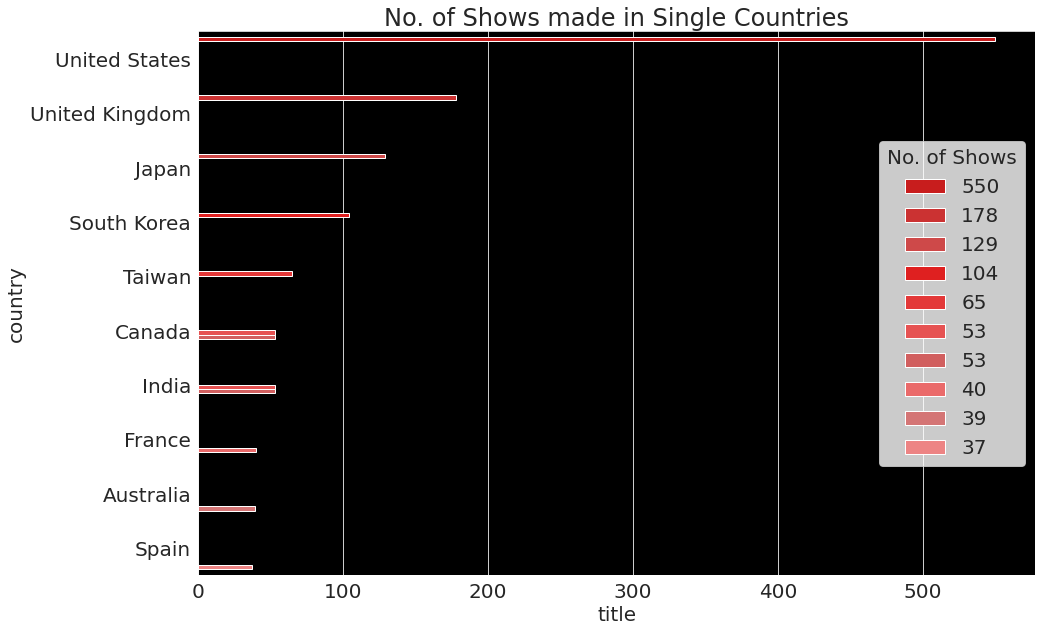

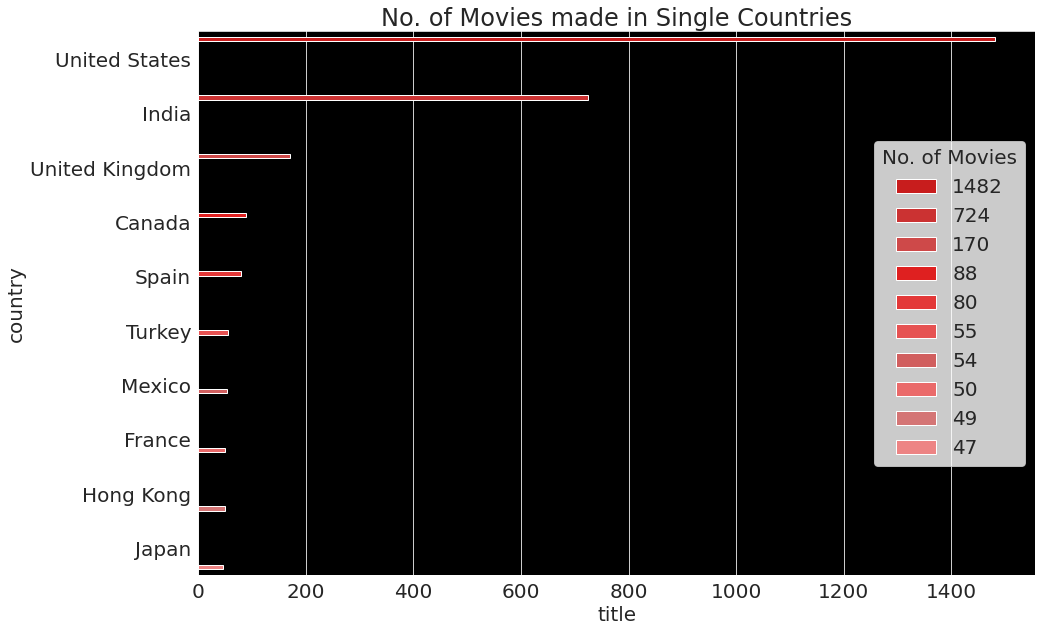

In [41]:
colors = ['#E40000', '#E41919', '#E43333', '#FF0000', '#FF1C1C', '#FF3939', '#E44C4C', '#FF5555', '#E46565', '#FF7272']
sb.set_palette(sb.color_palette(colors))

mpl.rcParams.update({'font.size': 20})
mpl.figure(figsize=(15, 10))
mpl.title('No. of Shows made in Single Countries')
sb.barplot(data=shows_per_country, x='title', y='country', hue=shows_per_country.title, hue_order=shows_per_country.title)
mpl.legend(title='No. of Shows', facecolor='white')

mpl.rcParams.update({'font.size': 20})
mpl.figure(figsize=(15, 10))
mpl.title('No. of Movies made in Single Countries')
sb.barplot(data=movies_per_country, x='title', y='country', hue=movies_per_country.title, hue_order=movies_per_country.title)
mpl.legend(title='No. of Movies', facecolor='white')

## Which country is likely the target audience of Netflix? 

In the above we may observe, that in both cases the most movies and shows are made in the United States, which is hardly a surprise, as they are considered the cultural cradle of the capitalistic world (sorry if this rhetoric seems political, it wasnt meant to).
We can also observe the influence of Bollywood in that India has almost half the amount of movies on Netflix which the US does.
Both facts are hardly surprising, as North America and India contain a high percentage of the worlds population, hence it makes sence from a managerial standpoint to try and cater to these markets, escpecially when many of the movies contained in the Netflix Catalogue were already made when they were added.
Furthermore the United Kingdom is the logical next step for an English-speaking page, which seeks to expand to Europe (which Netflix has done in 2012) and keep a foothold here, as fairly little needs to be adjusted, while catering to a fairly big market.
The next logical step is then Spain, which may open up South America (granted - there are numerous caviats, but generally as soon as you have Spanish content, this market can better judge whether it wants to use your services).


In [42]:
show_directors.rename(columns={'title': 'No. of Shows'}, inplace = False)

,director,No. of Shows
0,Alastair Fothergill,3
1,Stan Lathan,2
2,Iginio Straffi,2
3,Ken Burns,2
4,Rob Seidenglanz,2
5,Shin Won-ho,2
6,Michel Tikhomiroff,1
7,Miguel Conde,1
8,Neslihan Yesilyurt,1
9,Nizar Shafi,1


In [43]:
movie_directors.rename(columns={'title': 'No. of Movies'}, inplace = False)

,director,No. of Movies
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,14
2,Jay Karas,13
3,Jay Chapman,12
4,Martin Scorsese,9
5,Steven Spielberg,9
6,Johnnie To,8
7,Lance Bangs,8
8,David Dhawan,8
9,Cathy Garcia-Molina,7


## Directors in TV-Shows vs. those in Movies.

In the above we can see, that Show directors do not share the amount of work their Movie counterparts get. While this may be due to a number of factors (such as a show director actually potentially having a LOT more work with bringing a single season to a successful close than a movie director may have with their piece of art, as shown in the amount of time that a show series has vs. a single movie, or that the audience lost interest in their work over the course of one or several series), it might be interesting to look at what percentage of people have watched movies by Marcus Raboy and liked a high percentage of them, vs how many have done the same for series made by Alastair Fothergill.


In [44]:
import jovian

In [45]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "2018eeb1139/netflix-movies-and-tv-shows" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/2018eeb1139/netflix-movies-and-tv-shows


'https://jovian.ml/2018eeb1139/netflix-movies-and-tv-shows'

## Inferences and Conclusion

We have explored both the raw data and its broader context, taking a chance to compare multiple elements and thinking about its potential.
My conclusion is, that while the provided dataset may already answer an array of questions, it would become truly interesting when applied to a deeper context.

We have explored the data itself, cleaned and separated it for use in particular circumstances and applications.

We have taken said data and applied it to a more specialised context, using this to generate a comprehensive and visual dataset, which may be used to draw relevant conclusions from.

And we have taken said datasets and both used them in further applications and put them together to be compared at the readers leisure.


In [46]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## References and Future Work

how to rename columns:
https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/

how to rotate the labels on a pie chart:
https://stackoverflow.com/questions/50235752/matplot-pie-rotate-labels-horizontally

how to change the background color:
https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color

how to change the label color:
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.legend.html

sb.barplot documentation:
https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot

using custom colors in seaborn:
https://towardsdatascience.com/how-to-use-your-own-color-palettes-with-seaborn-a45bf5175146

In [82]:
import jovian

In [83]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "2018eeb1139/netflix-movies-and-tv-shows" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/2018eeb1139/netflix-movies-and-tv-shows


'https://jovian.ml/2018eeb1139/netflix-movies-and-tv-shows'